#### Question - 1

Implement a two-layer perceptron with the backpropagation algorithm to solve the parity problem.
You must implement the forward and backpropagation paths entirely on your own,
including an implementation of a perceptron and the activation function. The desired
output for the parity problem is 1 if an input pattern (which contains 4-binary bits) contains an odd
number of 1's, and 0 otherwise. Follow the algorithm introduced in class. Use a network where the
input has 4 binary elements, 4 hidden units for the first layer, and one output unit for the second layer. The learning procedure is stopped when an absolute error (difference) of 0.05 is reached for
every input pattern. Other implementation details are:
Initialize all weights and biases to random numbers between -1 and 1.
 Use a logistic sigmoid as the activation function for all units.
 Randomize the order of samples for each epoch, using stochastic gradient descent to update
the weights.
After programming is done, do the following:
1. Vary the value of n from 0.05 to 0.5 using an increment of 0.05, and report the number of
epochs for each choice of n. Also generate learning curve plots for each case. Discuss how the
value of n influences convergence.
2. Include a momentum term in the weight update with alpha = 0.9 and report its effect on the
speed of training for each value of n.

In [ ]:
import numpy as np
from copy import deepcopy
import seaborn as sb
import matplotlib.pyplot as plt

Function to get the binary code for each digits i.e 0 to 16

In [40]:
def integer_to_binary(num):
    return np.unpackbits(np.arange(num, num+1, dtype='>i%d' %(1)).view(np.uint8))[-4:]

Function for train data and actual output data

In [42]:
def get_train_data():
    X = np.array([[1] + list(integer_to_binary(i)) for i in range(0,16)]).T
    D = np.array([bin(i).count("1")%2!=0 for i in range(0,16)]).reshape(1,16).astype(int)
    return X,D

In [131]:
def getweights():
    return [np.random.uniform(-1, 1, (5, 4))] + [np.random.uniform(-1, 1, (5, 1))]


Function for logistic sigmoid


In [130]:
def logistic_sigmoid(z):
    return 1/(1 + np.exp(-z))

Forward Propagation Function:


In [132]:
def forward_prop(x,W_layers):
    output = []
    output.append(logistic_sigmoid(np.dot(W_layers[0].T,x)))
    output.append(logistic_sigmoid(np.dot(W_layers[1].T,np.insert(output[0],0,1,axis=0))))
    return np.array(output, dtype='object')

##Backward Propagation function:

Weights are used to calculate gradient

Weight updated via delta rule(gradient descent)

Gradient descent is used to compute weight of 2nd hidden layer

It then backpropagates to find 1st hidden layer's weight

The hidden layers' weights are updated in the end

In [133]:
def back_prop(x,Y,d_k,W,eta,delta_w,alpha):
    y_k = Y[1]

    delta_k = y_k*(1-y_k)*(d_k-y_k)
    delta_w[1] = eta*delta_k.T*np.insert(Y[0],0,1,axis=0)+(alpha*delta_w[1])

    delta_j = Y[0]*(1-Y[0])*W[1][1:,:]*delta_k
    delta_w[0] = eta*delta_j.T*x+(alpha*delta_w[0])

    W[0] += delta_w[0]
    W[1] += delta_w[1]


Implementation of network perceptron

In [135]:
def network_perceptron(X,D,W,eta,alpha):
    epoch = 0
    delta_w = [np.zeros((5, 4))] + [np.zeros((5, 1))]
    error = []
    
    while True:
        isError = True
        er=0
        tot=0
        Stoch_x=np.random.permutation(X)
        for i in range(0,16):
            
            x = X[:,i].reshape(5,1)
            Y = forward_prop(x,W)
            back_prop(x, Y, np.reshape(D[:, i], (1, 1)), W, eta, delta_w, alpha)
            er = np.abs(np.squeeze(D[:,i]-Y[1]))
            
            tot+=er
            error.append(tot)
            if er <= 0.05:
                isError = False
        if epoch % 1000 == 0:
            print('Epoch: ', epoch,"Error :",er)

        epoch += 1
        if not isError:
            break
  
    plt.plot(error)
    plt.ylabel('Loss ')
    plt.show()
    return epoch

Learning rates from 0.05 to 0.5

In [136]:
def rate():
    rates = []
    x = 0
    while x <= .45:
        x += .05
        rates.append(round(x,2))
    return rates

LR = rate()
LR

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

Function for outputs without momentum:


In [137]:
input,output=get_train_data()
weights=getweights()

def Output_WITHOUT_momentum():
    for i in LR:
        print("eta : ", i, ", momentum :", 0, " epoch : ", network_perceptron(input, output, deepcopy(weights), i, 0))
    
    

Function for output with added momentum

In [138]:
def Output_WITH_momentum():
    alpha=0.9;
    for i in LR:
        print("eta : ", i, ", momentum :", 0.9, " epoch : ", network_perceptron(input, output, deepcopy(weights), i, alpha))

Epoch:  0 Error : 0.6644988530525484
Epoch:  1000 Error : 0.49970308197477653
Epoch:  2000 Error : 0.49779637208438104
Epoch:  3000 Error : 0.4976839238129332
Epoch:  4000 Error : 0.49790733022365596
Epoch:  5000 Error : 0.49431470589754894
Epoch:  6000 Error : 0.8484127020534763


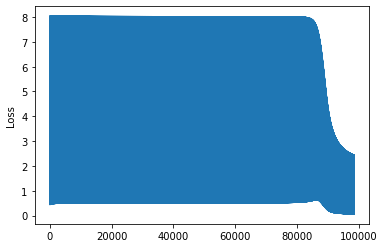

eta :  0.05 , momentum : 0.9  epoch :  6162
Epoch:  0 Error : 0.5958972125631796
Epoch:  1000 Error : 0.49895342424672773
Epoch:  2000 Error : 0.5000226492160423
Epoch:  3000 Error : 0.49983643220435614
Epoch:  4000 Error : 0.4975230691388597


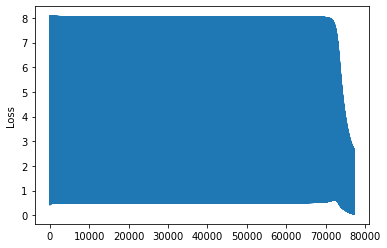

eta :  0.1 , momentum : 0.9  epoch :  4826
Epoch:  0 Error : 0.5389751396362981
Epoch:  1000 Error : 0.50021873860948
Epoch:  2000 Error : 0.500935852121587
Epoch:  3000 Error : 0.35658157234589893


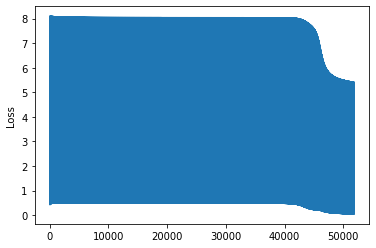

eta :  0.15 , momentum : 0.9  epoch :  3241
Epoch:  0 Error : 0.4953093716458033
Epoch:  1000 Error : 0.5007168165432392
Epoch:  2000 Error : 0.3589829967586847


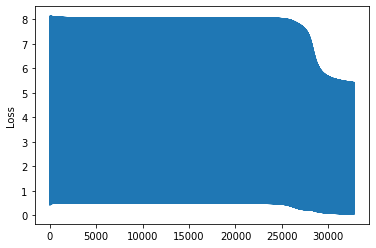

eta :  0.2 , momentum : 0.9  epoch :  2049
Epoch:  0 Error : 0.4638226221532058
Epoch:  1000 Error : 0.501207615550347


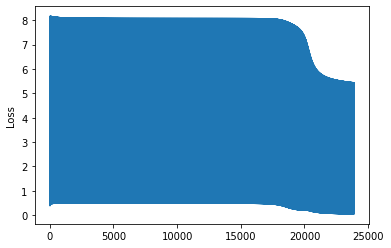

eta :  0.25 , momentum : 0.9  epoch :  1494
Epoch:  0 Error : 0.44253769031512125
Epoch:  1000 Error : 0.3514213998330025


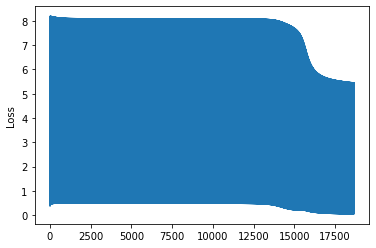

eta :  0.3 , momentum : 0.9  epoch :  1167
Epoch:  0 Error : 0.4294817405269954


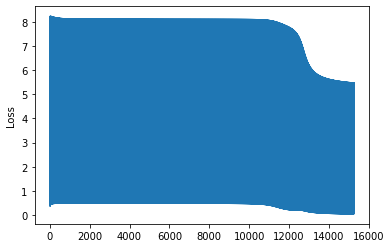

eta :  0.35 , momentum : 0.9  epoch :  954
Epoch:  0 Error : 0.42298402622481757


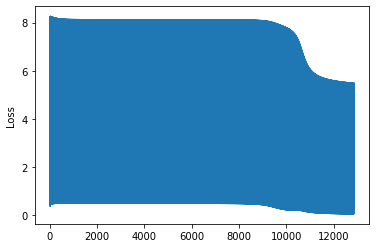

eta :  0.4 , momentum : 0.9  epoch :  804
Epoch:  0 Error : 0.42170489939410455


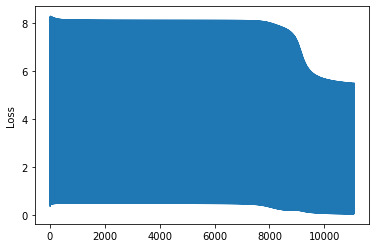

eta :  0.45 , momentum : 0.9  epoch :  693
Epoch:  0 Error : 0.4245801425539682


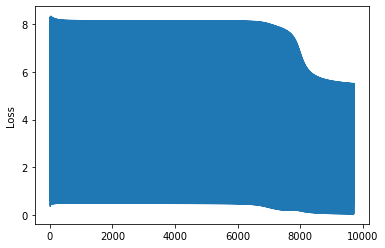

eta :  0.5 , momentum : 0.9  epoch :  608


In [139]:
Output_WITH_momentum()

Epoch:  0 Error : 0.7269019263556481
Epoch:  1000 Error : 0.5116044838543474
Epoch:  2000 Error : 0.5065890746384453
Epoch:  3000 Error : 0.5049485075769441
Epoch:  4000 Error : 0.5041821072094498
Epoch:  5000 Error : 0.5036847612088579
Epoch:  6000 Error : 0.5032854003705757
Epoch:  7000 Error : 0.5029244979295846
Epoch:  8000 Error : 0.502575292484995
Epoch:  9000 Error : 0.502223737381337
Epoch:  10000 Error : 0.5018637483142525
Epoch:  11000 Error : 0.5014959425193688
Epoch:  12000 Error : 0.5011264652784951
Epoch:  13000 Error : 0.5007652092053335
Epoch:  14000 Error : 0.5004236533700958
Epoch:  15000 Error : 0.5001127785398763
Epoch:  16000 Error : 0.4998414519398389
Epoch:  17000 Error : 0.499615493676886
Epoch:  18000 Error : 0.49943743595789125
Epoch:  19000 Error : 0.4993068324413862
Epoch:  20000 Error : 0.4992209010599548
Epoch:  21000 Error : 0.4991752855325675
Epoch:  22000 Error : 0.49916477145247756
Epoch:  23000 Error : 0.4991838607262337
Epoch:  24000 Error : 0.499227

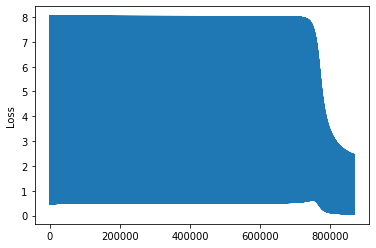

eta :  0.05 , momentum : 0  epoch :  54220
Epoch:  0 Error : 0.7157754440480374
Epoch:  1000 Error : 0.5105166564354213
Epoch:  2000 Error : 0.5068915533299854
Epoch:  3000 Error : 0.5045749542100888
Epoch:  4000 Error : 0.5027707970923252
Epoch:  5000 Error : 0.5018442215254182
Epoch:  6000 Error : 0.5016355390726683
Epoch:  7000 Error : 0.5017733191644657
Epoch:  8000 Error : 0.5020209409752528
Epoch:  9000 Error : 0.5022767126085116
Epoch:  10000 Error : 0.5025052941560961
Epoch:  11000 Error : 0.5026969382791788
Epoch:  12000 Error : 0.5028506600763917
Epoch:  13000 Error : 0.5029680771277281
Epoch:  14000 Error : 0.5030511338317082
Epoch:  15000 Error : 0.5031011185928923
Epoch:  16000 Error : 0.5031180389377492
Epoch:  17000 Error : 0.5030999561590073
Epoch:  18000 Error : 0.5030419903323528
Epoch:  19000 Error : 0.5029345901562962
Epoch:  20000 Error : 0.5027602669802161
Epoch:  21000 Error : 0.5024869693463117
Epoch:  22000 Error : 0.5020534776897378
Epoch:  23000 Error : 0.501

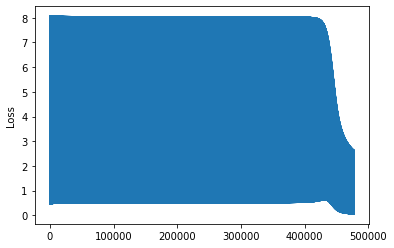

eta :  0.1 , momentum : 0  epoch :  29853
Epoch:  0 Error : 0.705519725943532
Epoch:  1000 Error : 0.5104079633830848
Epoch:  2000 Error : 0.5044236162049058
Epoch:  3000 Error : 0.5034671877764927
Epoch:  4000 Error : 0.5039236699921927
Epoch:  5000 Error : 0.5043277630958458
Epoch:  6000 Error : 0.5045886506924592
Epoch:  7000 Error : 0.504754570624514
Epoch:  8000 Error : 0.5048587576249314
Epoch:  9000 Error : 0.504921457625323
Epoch:  10000 Error : 0.5049564963412159
Epoch:  11000 Error : 0.5049740044627111
Epoch:  12000 Error : 0.5049815183634098
Epoch:  13000 Error : 0.5049845816380026
Epoch:  14000 Error : 0.5049871853287881
Epoch:  15000 Error : 0.5049921237363053
Epoch:  16000 Error : 0.5050012800034114
Epoch:  17000 Error : 0.5050158476825756
Epoch:  18000 Error : 0.5050364962123254
Epoch:  19000 Error : 0.5050634888301151
Epoch:  20000 Error : 0.5050967596745912
Epoch:  21000 Error : 0.5051359531292177
Epoch:  22000 Error : 0.5051804228163328
Epoch:  23000 Error : 0.5052291

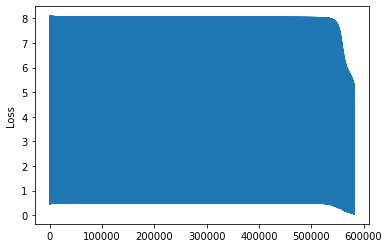

eta :  0.15 , momentum : 0  epoch :  36377
Epoch:  0 Error : 0.6962059674154959
Epoch:  1000 Error : 0.5077411726003835
Epoch:  2000 Error : 0.5052667879574244
Epoch:  3000 Error : 0.5059878566547342
Epoch:  4000 Error : 0.5063191076574038
Epoch:  5000 Error : 0.5064874085650279
Epoch:  6000 Error : 0.5065923044947989
Epoch:  7000 Error : 0.506673225569183
Epoch:  8000 Error : 0.5067522813904076
Epoch:  9000 Error : 0.5068436891531932
Epoch:  10000 Error : 0.5069577011069469
Epoch:  11000 Error : 0.5071032470924258
Epoch:  12000 Error : 0.5072873776295057
Epoch:  13000 Error : 0.5074988771802614
Epoch:  14000 Error : 0.5076296701135238
Epoch:  15000 Error : 0.5074470869287075
Epoch:  16000 Error : 0.5064049974276973
Epoch:  17000 Error : 0.41034456015718535
Epoch:  18000 Error : 0.36779247369619417
Epoch:  19000 Error : 0.371385833083259


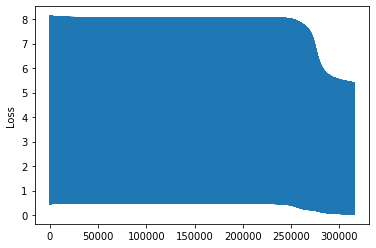

eta :  0.2 , momentum : 0  epoch :  19705
Epoch:  0 Error : 0.6878743983096905
Epoch:  1000 Error : 0.5067913372923958
Epoch:  2000 Error : 0.5075928438775668
Epoch:  3000 Error : 0.5080040152199938
Epoch:  4000 Error : 0.5081927334087158
Epoch:  5000 Error : 0.5083442934539305
Epoch:  6000 Error : 0.5085100992433054
Epoch:  7000 Error : 0.5087201602208672
Epoch:  8000 Error : 0.5089906756647063
Epoch:  9000 Error : 0.5092460150110455
Epoch:  10000 Error : 0.5091670120075094
Epoch:  11000 Error : 0.5019194172166286
Epoch:  12000 Error : 0.36917580361230273
Epoch:  13000 Error : 0.3724248066396452


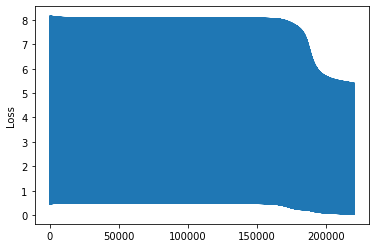

eta :  0.25 , momentum : 0  epoch :  13785
Epoch:  0 Error : 0.6805375155615769
Epoch:  1000 Error : 0.5085195142648066
Epoch:  2000 Error : 0.5095413233706788
Epoch:  3000 Error : 0.5098256466669119
Epoch:  4000 Error : 0.510068350352345
Epoch:  5000 Error : 0.5103649545514986
Epoch:  6000 Error : 0.5107467273046188
Epoch:  7000 Error : 0.5109834789949037
Epoch:  8000 Error : 0.5111660827372034
Epoch:  9000 Error : 0.37284766426840393
Epoch:  10000 Error : 0.3746961756279821


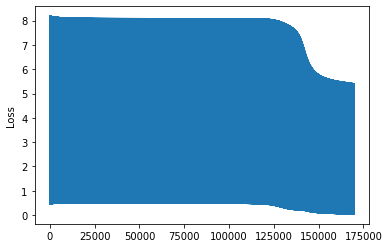

eta :  0.3 , momentum : 0  epoch :  10616
Epoch:  0 Error : 0.6741844687734427
Epoch:  1000 Error : 0.5106353930391536
Epoch:  2000 Error : 0.511344750756885
Epoch:  3000 Error : 0.5116912019448686
Epoch:  4000 Error : 0.512113568363926
Epoch:  5000 Error : 0.5126187503290334
Epoch:  6000 Error : 0.5130525113638328
Epoch:  7000 Error : 0.4027308471432643
Epoch:  8000 Error : 0.376335693925684


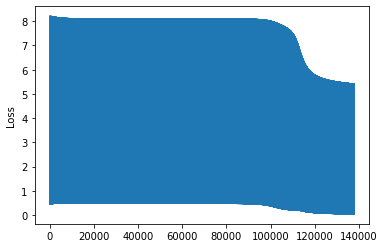

eta :  0.35 , momentum : 0  epoch :  8614
Epoch:  0 Error : 0.6687858850280126
Epoch:  1000 Error : 0.5125744991143327
Epoch:  2000 Error : 0.5131572072574436
Epoch:  3000 Error : 0.5136733327827688
Epoch:  4000 Error : 0.5143158214692412
Epoch:  5000 Error : 0.5152968611686288
Epoch:  6000 Error : 0.3744836334398012
Epoch:  7000 Error : 0.3801536948600616


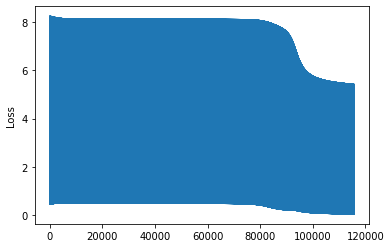

eta :  0.4 , momentum : 0  epoch :  7231
Epoch:  0 Error : 0.6642985864444482
Epoch:  1000 Error : 0.5143920182528422
Epoch:  2000 Error : 0.5150280727644908
Epoch:  3000 Error : 0.515779800963367
Epoch:  4000 Error : 0.5164744129017537
Epoch:  5000 Error : 0.3822883499022848
Epoch:  6000 Error : 0.38195134059671454


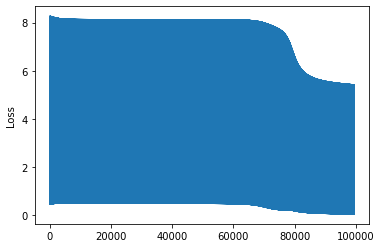

eta :  0.45 , momentum : 0  epoch :  6218
Epoch:  0 Error : 0.660669845491894
Epoch:  1000 Error : 0.5161735311039662
Epoch:  2000 Error : 0.516970640273792
Epoch:  3000 Error : 0.5178990055816071
Epoch:  4000 Error : 0.4979474364553099
Epoch:  5000 Error : 0.3824774143997887


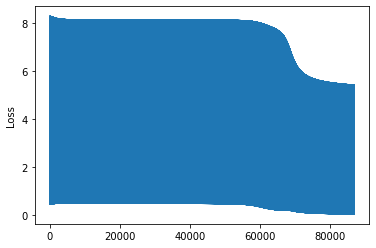

eta :  0.5 , momentum : 0  epoch :  5430


In [140]:
Output_WITHOUT_momentum()

Observation 1 :

From the output  The time taken is quite high which indicates slower training speed. This means that the model is taking a long time to converge.
The initial observation that can be made is value of 'eta' increases, the number of epochs decreases. 

Observation 2:

 the alpha value when set to 0.9 with eta in same range 0.05 - 0.5, the number of epochs decreases substantially. from the output 
 
This shows substantial increase in the training speed for momentum : 0.9. Thus, the neural network converges much faster

Observation 3:
    If the learning rates are varied sometimes the error rate may not reach the expected value and jump over it causing repeated osculations which can reduced by implementing the gradient descent which help to attain a minimum.